<a href="https://colab.research.google.com/github/Drakies3172/machine-learning-DIVE-INTO-CODE/blob/main/fuji-gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


# New section

# New section

Problem 1:

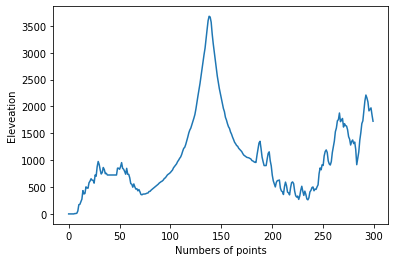

In [55]:
import matplotlib.pyplot as plt
plt.plot(fuji[:,0],fuji[:,3])
plt.xlabel("Numbers of points")
plt.ylabel("Eleveation")
plt.show()

Problem 2:

In [83]:
def gradient(positions,elevations):
  return elevations[positions] - elevations[positions-1]
fuji_elevations = fuji[:,3]
print(gradient(136,fuji_elevations))


168.35000000000036


Problem 3:

In [88]:
def cal_nextpoints(current_points,alpha):
  predicted_value =  current_points - alpha*gradient(current_points,fuji_elevations)
  return int(round(predicted_value,0))
print(cal_nextpoints(136,0.02))
print(cal_nextpoints(142,0.02))

133
146


Problem 4:

In [87]:
def go_down(current_points,alpha):
  lst = [current_points]
  while (True):
    next_point = cal_nextpoints(current_points,alpha)
    if next_point == current_points:
      break
    current_points = next_point
    lst.append(next_point)
  return lst
list_point = go_down(136,0.1)
print(list_point)

[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


When we change the learning rate, the position is lower => we are going down

Problem 5:

In [89]:
import matplotlib.pyplot as plt
def plot(list_p):
  altitude = []
  slope = []
  for k in range(len(list_p)):
    altitude.append(fuji[list_p[k]][3])
    slope.append(fuji[list_p[k]][1])
    points = np.array(list_p)
  al = np.array(altitude)
  sl = np.array(slope)

  plt.plot(points, al,marker = 'o',markersize = 12)
  plt.title("Altitude")
  plt.xlabel("points")
  plt.ylabel("altitude (m)")
  plt.show()
  plt.title("Slope")
  plt.xlabel("points")
  plt.ylabel("slope (degree)")
  plt.plot(points, sl,marker = 'o',markersize = 12)
  plt.show()

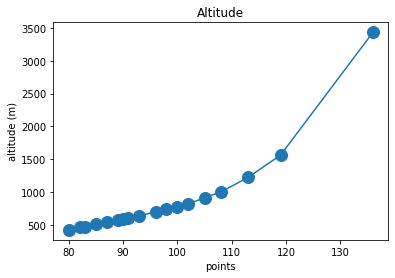

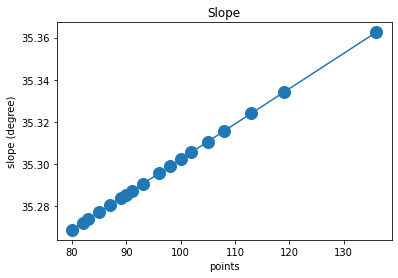

In [90]:
plot(list_point)


Problem 6

[142, 160, 164, 167, 171, 175, 176]


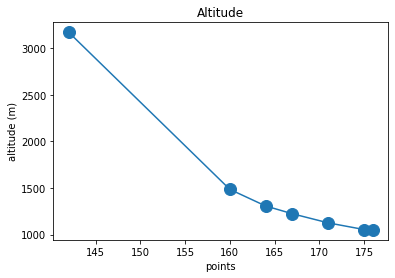

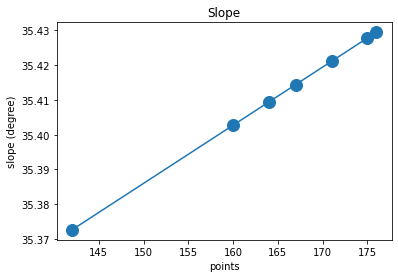

In [91]:
list_point2 = go_down(142 ,0.1)
print(list_point2)
plot(list_point2)

Problem 7:

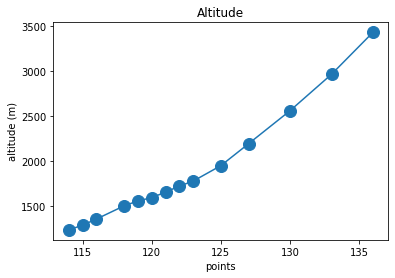

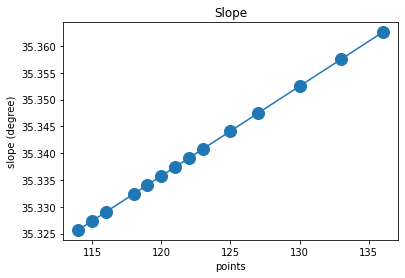

In [92]:
# alpha = 0.02
lst = go_down(136,0.02)
plot(lst)

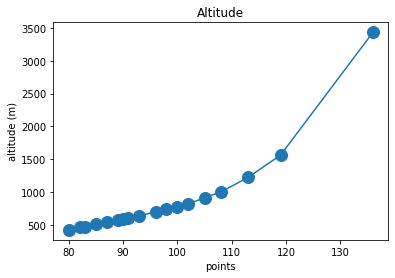

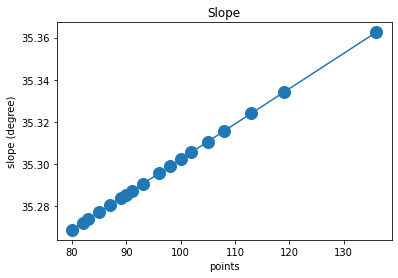

In [93]:
# alpha = 0.1
lst = go_down(136,0.1)
plot(lst)